<a href="https://colab.research.google.com/github/CypriLepto/Basic-Sentiment-Analysis-with-TensorFlow/blob/main/bea_03_ElectricPowerPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hőerőművi adatok

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
# Adatok letöltése:
# Sajá Dive__ Train N=___https://drive.google.com/file/d/1Kd-K5TgNjfuCuNMLJXr-qIpPJ6NHdlX2/view?usp=drive_link

import pandas as pd
import numpy as np
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and preview data
df = pd.read_csv('Train_KR.csv')
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB


<Axes: xlabel='PE'>

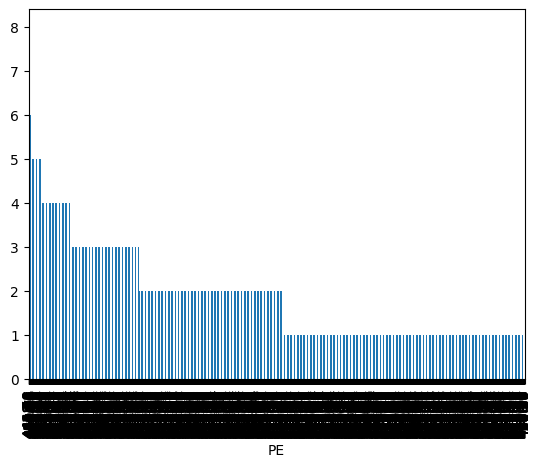

In [ ]:
# Plot the distribution of PE
df['PE'].value_counts().plot.bar()

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,19.588562,54.243393,1013.276923,73.403318,454.503761
std,7.463503,12.724457,5.939926,14.529301,17.117243
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.447500,41.660000,1009.150000,63.487500,439.867500
50%,20.280000,52.065000,1012.940000,75.010000,451.745000
75%,25.680000,66.510000,1017.290000,84.852500,468.765000
max,37.110000,81.560000,1033.290000,100.160000,495.760000


In [ ]:
# Declare feature vector and target variable
X = df[['AT','V','AP','RH']]
y = df['PE']

In [ ]:
# Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Build the model with Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

úgy szar az egész, ahoyg van... a PE arány/intervallum skálájú a RAndomsoest meg

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

17.16951218034435

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

#SHAP Explanation Force Plots

In [ ]:
# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

#SHAP Feature Importance

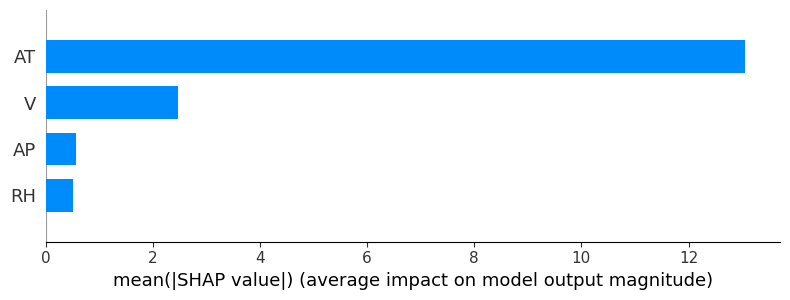

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

#SHAP Summary Plot

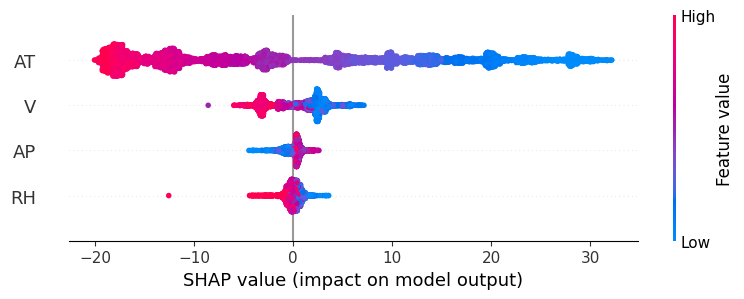

In [ ]:
shap.summary_plot(shap_values, X_train)

#SHAP Dependence Plot

In [ ]:
shap.dependence_plot('PE', shap_values, X_train)


In [ ]:
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


#Neural network

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import shap

In [ ]:
# Import data
#file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv('Train_KR.csv')

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df['PE2'] = 1

In [ ]:
df.head()

,AT,V,AP,RH,PE,PE2
0,10.54,34.03,1018.71,74.00,478.77,1
1,7.08,39.99,1010.55,91.44,482.83,1
2,14.49,41.16,1000.50,82.17,465.24,1
3,10.73,25.36,1009.35,100.15,469.43,1
4,22.88,63.91,1009.63,87.82,442.50,1


In [ ]:
# make target variable
y = df.pop('PE2')
#y = df.pop('target') ---- ez ...létrhotam, mad eldobtam...

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
# prepare features
list_numerical = ['AT', 'V', 'AP',  'RH',]

X = df[list_numerical]

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train[list_numerical])

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
model.compile(optimizer="adam",
              loss ="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train,
         epochs=15,
         batch_size=13,
         validation_data=(X_test, y_test)
         )

Epoch 1/15
528/528 [==============================] - 2s 3ms/step - loss: 0.1071 - accuracy: 0.9907 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 2/15
528/528 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/15
528/528 [==============================] - 2s 4ms/step - loss: 6.8418e-04 - accuracy: 1.0000 - val_loss: 4.1655e-04 - val_accuracy: 1.0000
Epoch 4/15
528/528 [==============================] - 2s 4ms/step - loss: 3.0139e-04 - accuracy: 1.0000 - val_loss: 2.0841e-04 - val_accuracy: 1.0000
Epoch 5/15
528/528 [==============================] - 2s 3ms/step - loss: 1.6039e-04 - accuracy: 1.0000 - val_loss: 1.1925e-04 - val_accuracy: 1.0000
Epoch 6/15
528/528 [==============================] - 2s 3ms/step - loss: 9.4626e-05 - accuracy: 1.0000 - val_loss: 7.3304e-05 - val_accuracy: 1.0000
Epoch 7/15
528/528 [==============================] - 2s 3ms/step - loss: 5.9519e-05 - accuracy: 1.0000 - val_loss: 

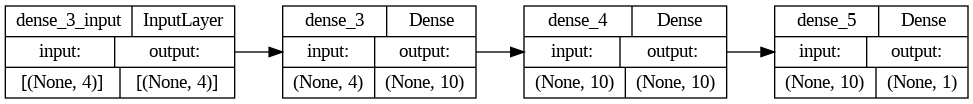

In [ ]:
# Let’s visualize the connectivity graph.
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy", accuracy)

54/54 [==============================] - 0s 2ms/step - loss: 2.2498e-06 - accuracy: 1.0000
Accuracy 1.0


In [ ]:
explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])

In [ ]:
explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])

In [ ]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100,:], nsamples=500)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()